In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from torchxrayvision.torchxrayvision import datasets as DS

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import array
color = sns.color_palette()

%matplotlib inline

In [3]:
from skimage.transform import resize
from skimage.color import gray2rgb

def make_same_size(img):
    resized_image = resize(img[0], (299, 299))
    return resized_image

In [4]:
all_data = DS.COVID19_Dataset(transform=make_same_size, data_aug=gray2rgb)
all_data

{'ARDS': {0.0: 163, 1.0: 14},
 'Bacterial Pneumonia': {0.0: 160, 1.0: 17},
 'COVID-19': {0.0: 52, 1.0: 125},
 'Chlamydophila': {0.0: 176, 1.0: 1},
 'Fungal Pneumonia': {0.0: 164, 1.0: 13},
 'Klebsiella': {0.0: 176, 1.0: 1},
 'Legionella': {0.0: 175, 1.0: 2},
 'MERS': {0.0: 177},
 'No Finding': {0.0: 175, 1.0: 2},
 'Pneumocystis': {0.0: 164, 1.0: 13},
 'Pneumonia': {0.0: 2, 1.0: 175},
 'SARS': {0.0: 161, 1.0: 16},
 'Streptococcus': {0.0: 164, 1.0: 13},
 'Viral Pneumonia': {0.0: 36, 1.0: 141}}


COVID19_Dataset num_samples=177 views=['PA']

In [5]:
all_data[10]['lab']

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
      dtype=float32)

In [6]:
print(all_data[0]['lab'].shape)

(14,)


In [7]:
data_len = len(all_data)

dataset_np_X = np.zeros((data_len, 299, 299, 3))
dataset_np_Y = np.zeros((data_len,14))

In [8]:
# Go through all the covid cases. The label for these cases will be 1
for i in range(data_len):
    entry = all_data[i]
    
    dataset_np_X[i] = entry['PA']
    dataset_np_Y[i] = entry['lab']
    if(entry['lab'][-4] == 0):
        print(entry['lab'])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [9]:
dataset_np_X = (dataset_np_X*255).astype(int)
dataset_np_X

array([[[[253, 253, 253],
         [218, 218, 218],
         [180, 180, 180],
         ...,
         [ 72,  72,  72],
         [ 68,  68,  68],
         [ 65,  65,  65]],

        [[253, 253, 253],
         [216, 216, 216],
         [179, 179, 179],
         ...,
         [ 72,  72,  72],
         [ 68,  68,  68],
         [ 64,  64,  64]],

        [[253, 253, 253],
         [220, 220, 220],
         [184, 184, 184],
         ...,
         [ 73,  73,  73],
         [ 68,  68,  68],
         [ 64,  64,  64]],

        ...,

        [[252, 252, 252],
         [162, 162, 162],
         [ 64,  64,  64],
         ...,
         [102, 102, 102],
         [101, 101, 101],
         [ 98,  98,  98]],

        [[252, 252, 252],
         [162, 162, 162],
         [ 64,  64,  64],
         ...,
         [101, 101, 101],
         [100, 100, 100],
         [100, 100, 100]],

        [[252, 252, 252],
         [162, 162, 162],
         [ 64,  64,  64],
         ...,
         [ 91,  91,  91],
        

c:\python37\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


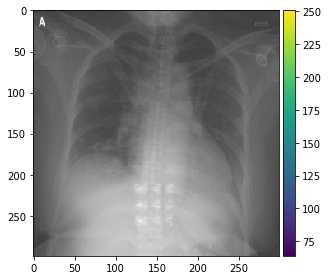

In [10]:
from skimage import data, io

io.imshow(dataset_np_X[4])

### Building Model

In [11]:
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [12]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights=None,include_top=True, classes=14)
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

### Images

In [13]:
dataset_np_X

array([[[[253, 253, 253],
         [218, 218, 218],
         [180, 180, 180],
         ...,
         [ 72,  72,  72],
         [ 68,  68,  68],
         [ 65,  65,  65]],

        [[253, 253, 253],
         [216, 216, 216],
         [179, 179, 179],
         ...,
         [ 72,  72,  72],
         [ 68,  68,  68],
         [ 64,  64,  64]],

        [[253, 253, 253],
         [220, 220, 220],
         [184, 184, 184],
         ...,
         [ 73,  73,  73],
         [ 68,  68,  68],
         [ 64,  64,  64]],

        ...,

        [[252, 252, 252],
         [162, 162, 162],
         [ 64,  64,  64],
         ...,
         [102, 102, 102],
         [101, 101, 101],
         [ 98,  98,  98]],

        [[252, 252, 252],
         [162, 162, 162],
         [ 64,  64,  64],
         ...,
         [101, 101, 101],
         [100, 100, 100],
         [100, 100, 100]],

        [[252, 252, 252],
         [162, 162, 162],
         [ 64,  64,  64],
         ...,
         [ 91,  91,  91],
        

In [14]:
train_data, valid_data, train_labels, valid_labels = train_test_split(dataset_np_X, dataset_np_Y, test_size=0.10, random_state=42)


In [15]:
train_labels.shape

(159, 14)

In [16]:
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [17]:
train_data[18].shape

(299, 299, 3)

In [18]:
train_labels

array([[0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [19]:
valid_data.shape

(18, 299, 299, 3)

In [20]:
valid_labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 0., 0

In [21]:
for u in range(100):
    nb_batch_size = 10
    nb_epochs = 100
    history = model.fit(
        x=train_data, 
        y=train_labels, 
        validation_data = (valid_data , valid_labels), 
        epochs=nb_epochs,
        batch_size = nb_batch_size
    )
    model_json = model.to_json()
    passed_epochs = str((u+1)*100)
    with open("Xception_6_"+passed_epochs+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("Xception_6_"+passed_epochs+".h5")
    print("Saved 6_"+passed_epochs+" model to disk")

Train on 159 samples, validate on 18 samples
Epoch 1/100
159/159 [==============================] - 148s 929ms/sample - loss: 7.1228 - accuracy: 0.1572 - val_loss: 5.3710 - val_accuracy: 0.1667
Epoch 2/100
159/159 [==============================] - 139s 871ms/sample - loss: 9.7612 - accuracy: 0.1069 - val_loss: 5.0823 - val_accuracy: 0.1667
Epoch 3/100
 40/159 [======>.......................] - ETA: 1:42 - loss: 12.8996 - accuracy: 0.1000

KeyboardInterrupt: 

In [ ]:
model.predict(valid_data)